In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmaps
from matplotlib.colors import LogNorm

In [2]:
def worldmap(img, vmin=0, vmax=1e2):
    projection = ccrs.PlateCarree(central_longitude=0)
    img_extent = (-180, 180, -90, 90)

    fig = plt.figure()
    ax = plt.subplot(projection=projection)
    ax.coastlines()
    im = ax.imshow(img,
                   origin='upper',
                   extent=img_extent,
                   transform=projection,
                   cmap='GnBu',
                   vmin=vmin, vmax=vmax)
    fig.colorbar(im, ax=ax, orientation='horizontal')

In [3]:
def worldmap_norm(data, vmin=1e-30):
    projection = ccrs.PlateCarree(central_longitude=0)
    img_extent = (-180, 180, -90, 90)
    
    print(f"min {data.min()} max {data.max()}")
    log_norm = LogNorm(vmin=vmin, vmax=data.max())
    #log_norm_data = log_norm(data, clip=True)

    fig = plt.figure()
    ax = plt.subplot(projection=projection)
    ax.coastlines()
    im = ax.imshow(data,
                   origin='upper',
                   extent=img_extent,
                   transform=projection,
                   cmap='GnBu',
                   norm=log_norm)
    fig.colorbar(im, ax=ax, orientation='horizontal')

In [4]:
def load(name, SUF='.hlf', day=356, second=86400, coef=1e12):
    if SUF == '.hlf':
        shape = (360, 720)
        areapath = '/home/kajiyama/H08/H08_20230612/map/dat/lnd_ara_/lndara.WFDEI.hlf'
        maskpath = '/home/kajiyama/H08/H08_20230612/map/dat/lnd_msk_/lndmsk.WFDEI.hlf'
    elif SUF == '.gl5':
        shape = (2160, 4320)
        areapath = '/home/kajiyama/H08/H08_20230612/map/dat/lnd_ara_/lndara.CAMA.gl5'
        maskpath = '/home/kajiyama/H08/H08_20230612/map/dat/lnd_msk_/lndmsk.CAMA.gl5'
    dtype = 'float32' # 4バイト
    lnddir = '/home/kajiyama/H08/H08_20230612/lnd/out'
    file = lnddir + name
    
    # area
    area = np.fromfile(areapath, dtype=dtype)
    area = area.reshape(shape)
    
    # data
    data = np.fromfile(file, dtype=dtype)
    lonlat = data.reshape(shape)
    
    # mask out
    mask = np.fromfile(maskpath, dtype=dtype)
    mask = mask.reshape(shape)
    lonlat = np.ma.masked_where(mask==0, lonlat)
    lonlat = np.ma.masked_where(lonlat>1e19, lonlat)
    
    # multiply area
    adm = lonlat*area
    
    # conversion from mm/s to mm/year
    adm = adm*day*second
    
    # conversion from kg to mm3
    # 1000kg = 1m3 = 1e9mm3
    # km3 = kg/1e12
    adm = adm/coef
    
    # sum up
    total = np.sum(adm)
    print(f"total {total} km3/year")
    
    return adm

# RESULTS

total 59850.14355742485 km3/year
min 0.0 max 0.6581885904


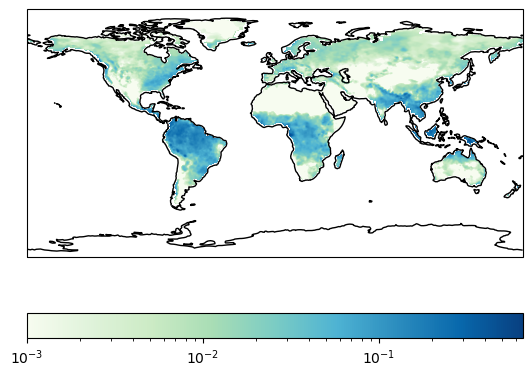

In [5]:
image = load(name='/Qtot____/W5E5LECD20190000.gl5', SUF='.gl5')
worldmap_norm(image, vmin=1e-3)

total 52390.89540712825 km3/year
min 0.0 max 23.261271552


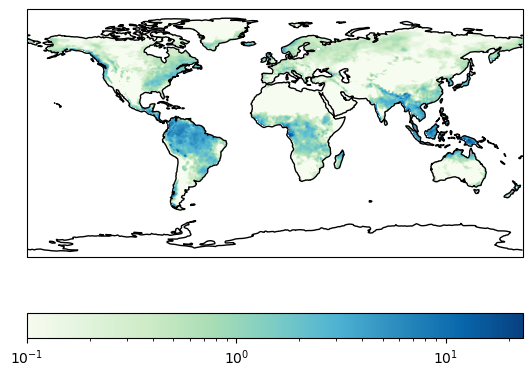

In [6]:
image = load(name='/Qtot____/W5E5LECD20190000.hlf', SUF='.hlf')
worldmap_norm(image, vmin=1e-1)

total 6136894083.400685 km3/year
min 0.0 max 3739803.27271465
gl5/hlf = 0.00023209604221446494


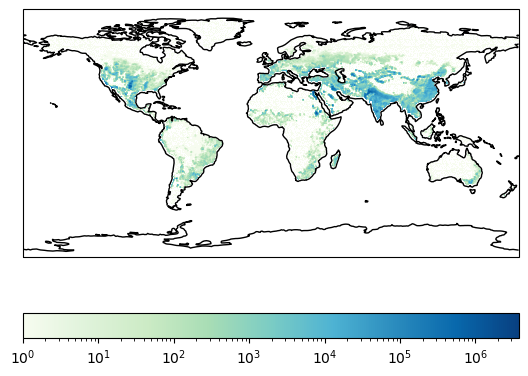

In [13]:
image = load(name='/DemAgr__/W5E5LECD20190000.gl5', SUF='.gl5')
worldmap_norm(image, vmin=1)
print(f"gl5/hlf = {6136894083/26441183677442}")

total 26441183677442.24 km3/year
min 0.0 max 99496710671.98024


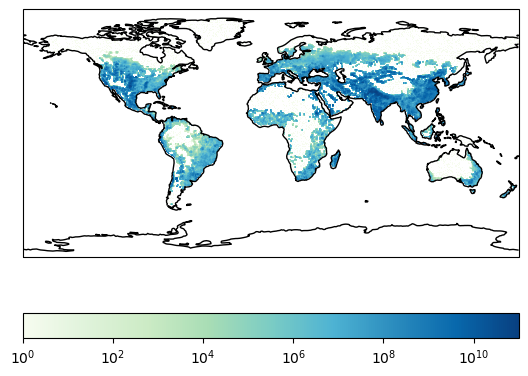

In [14]:
image = load(name='/DemAgr__/W5E5LECD20190000.hlf', SUF='.hlf')
worldmap_norm(image, vmin=1)

total 2187709194.65355 km3/year
min 0.0 max 218111.2679890944
gl5/hlf = 0.0004965800214458141


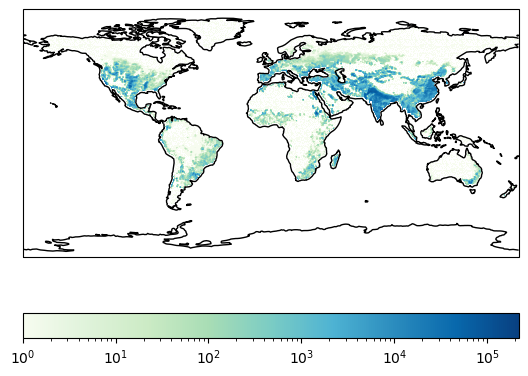

In [28]:
image = load(name='/DemAgr__/W5E5N_C_20190000.gl5', SUF='.gl5')
worldmap_norm(image, vmin=1)
print(f"gl5/hlf = {2187709194/4405552175922}")

total 4405552175922.382 km3/year
min 0.0 max 6849444134.041053


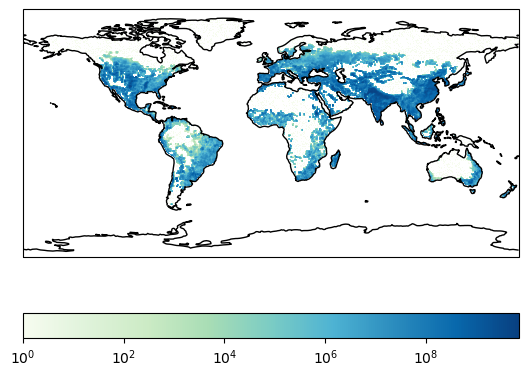

In [25]:
image = load(name='/DemAgr__/W5E5N_C_20190000.hlf', SUF='.hlf')
worldmap_norm(image, vmin=1)

total 2143834780.4001424 km3/year
min 0.0 max 2718224.450637005
gl5/hlf = 0.0002776189485889259


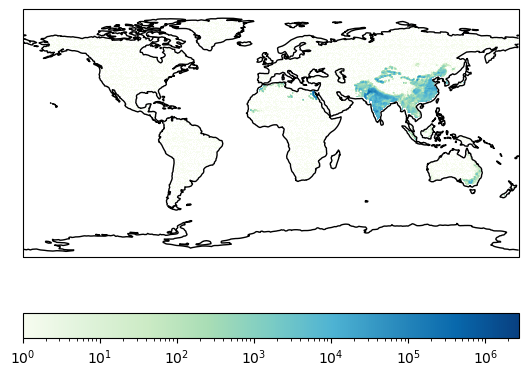

In [15]:
image = load(name='/DemAgr_1/W5E5LECD20190000.gl5', SUF='.gl5')
worldmap_norm(image, vmin=1)
print(f"gl5/hlf = {2143834780/7722220658556}")

total 7722220658556.768 km3/year
min 0.0 max 62964681474.63436


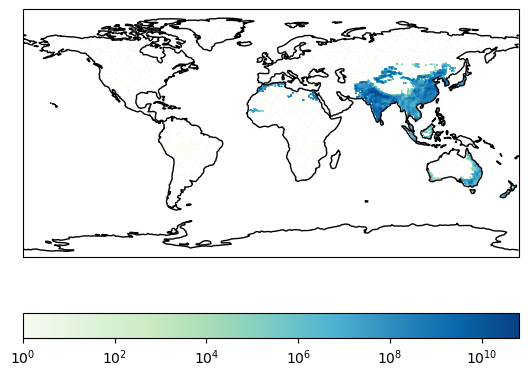

In [16]:
image = load(name='/DemAgr_1/W5E5LECD20190000.hlf', SUF='.hlf')
worldmap_norm(image, vmin=1)

total 3993059282.237528 km3/year
min 0.0 max 3261644.0804671487
gl5/hlf = 0.07636995424548293


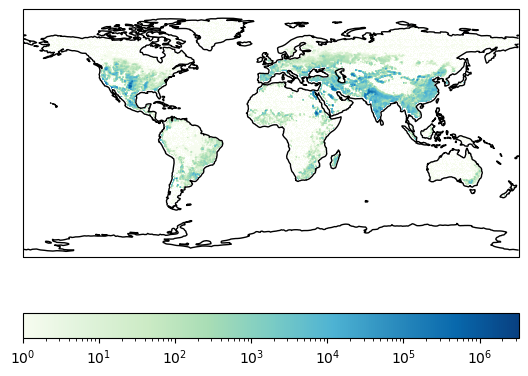

In [20]:
image = load(name='/DemAgr_2/W5E5LECD20190000.gl5', SUF='.gl5')
worldmap_norm(image, vmin=1)
print(f"gl5/hlf = {1765933/23123400}")

total 18718963402980.758 km3/year
min 0.0 max 65597260636.81379


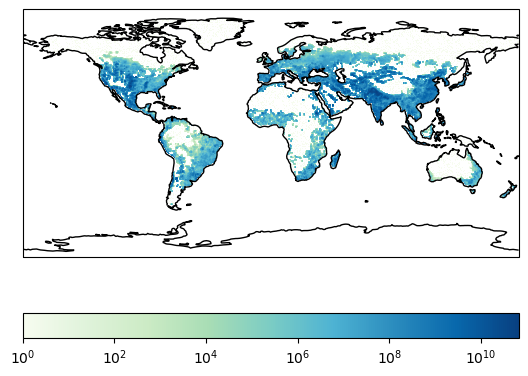

In [21]:
image = load(name='/DemAgr_2/W5E5LECD20190000.hlf', SUF='.hlf')
worldmap_norm(image, vmin=1)

total 153825789672.7049 km3/year
min 0.0 max 39328708160.99645
gl5/hlf = 0.13320190739024892


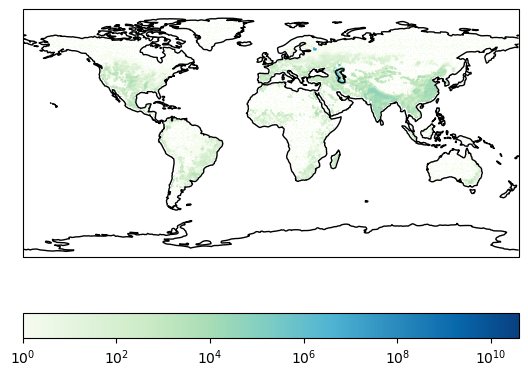

In [24]:
image = load(name='/RtFAgr__/W5E5LECD20190000.gl5', SUF='.gl5')
worldmap_norm(image, vmin=1)
print(f"gl5/hlf = {153825789672/1154831733913}")

total 1154831733913.2583 km3/year
min -0.0422955297 max 3310646402.480918


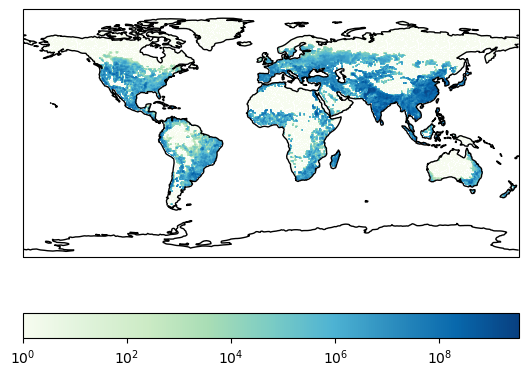

In [23]:
image = load(name='/RtFAgr__/W5E5LECD20190000.hlf', SUF='.hlf')
worldmap_norm(image, vmin=1)